# Quick look at 911 calls

In [1]:
#In case you don't have these libraries installed, uncomment next line with ctr+/ and install via pip
# !pip install pandas numpy matplotlib seaborn folium

In [2]:
import pandas as pd                                #Working with csv, xls and other type of data files
import numpy as np                                 #Working with calculus
import matplotlib.pyplot as plt                    #Plotting library, similar to Matlab's
import seaborn as sns                              #Simplified visualization library built on Matplotlib
import folium                                      #Geo visualization library based on Leaflet.js

import warnings                                    #Supress warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [3]:
# import os
# os.chdir("your working directory here")

# Loading our data

In [4]:
#Loading our data, assuming that we already changed our working directory and have csv file already put in
raw_data = pd.read_csv("911.csv")

In [5]:
#Initial look
raw_data.head(5)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [6]:
#Some initial info about our dataset
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205580 entries, 0 to 205579
Data columns (total 9 columns):
lat          205580 non-null float64
lng          205580 non-null float64
desc         205580 non-null object
zip          180597 non-null float64
title        205580 non-null object
timeStamp    205580 non-null object
twp          205506 non-null object
addr         205580 non-null object
e            205580 non-null int64
dtypes: float64(3), int64(1), object(5)
memory usage: 14.1+ MB


In [7]:
#Checking null values in our data
raw_data.isnull().sum()

lat              0
lng              0
desc             0
zip          24983
title            0
timeStamp        0
twp             74
addr             0
e                0
dtype: int64

In [8]:
#Replacing null zip values with 0 zero
raw_data.zip.fillna(value = 0, inplace = True)

In [9]:
#Custom functions to splitting the title
def title_split (title):
    return title.split(":")[0]
def sub_title (title):
    return title.split(":")[1]

In [10]:
#Applying custom functions to dataframe
raw_data["gen_title"] = raw_data["title"].apply(title_split)
raw_data["sub_title"] = raw_data["title"].apply(sub_title)

In [11]:
#See what we got
raw_data["gen_title"].value_counts()

EMS        102623
Traffic     72404
Fire        30553
Name: gen_title, dtype: int64

In [12]:
raw_data["sub_title"].value_counts()

 VEHICLE ACCIDENT -              48110
 DISABLED VEHICLE -              14845
 VEHICLE ACCIDENT                11663
 FIRE ALARM                      11493
 RESPIRATORY EMERGENCY           10719
 FALL VICTIM                     10341
 CARDIAC EMERGENCY               10338
 ROAD OBSTRUCTION -               6201
 SUBJECT IN PAIN                  5717
 HEAD INJURY                      5348
 UNKNOWN MEDICAL EMERGENCY        3751
 SYNCOPAL EPISODE                 3609
 SEIZURES                         3433
 GENERAL WEAKNESS                 3180
 ALTERED MENTAL STATUS            2979
 ABDOMINAL PAINS                  2975
 FIRE INVESTIGATION               2898
 MEDICAL ALERT ALARM              2834
 HEMORRHAGING                     2617
 OVERDOSE                         2608
 UNCONSCIOUS SUBJECT              2588
 CVA/STROKE                       2579
 NAUSEA/VOMITING                  2402
 GAS-ODOR/LEAK                    2266
 BUILDING FIRE                    2064
 HAZARDOUS ROAD CONDITION

In [13]:
#Let's look at Traffic accident reasons
raw_data[raw_data["gen_title"]== "Traffic"]["sub_title"].value_counts(sort = True).head(10)

 VEHICLE ACCIDENT -             48110
 DISABLED VEHICLE -             14845
 ROAD OBSTRUCTION -              6201
 HAZARDOUS ROAD CONDITIONS -     1934
 VEHICLE FIRE -                  1104
 VEHICLE LEAKING FUEL -           123
 DEBRIS/FLUIDS ON HIGHWAY -        87
Name: sub_title, dtype: int64

In [14]:
#We see that, our sub title column is "dirty" and needs further formatting
raw_data["sub_title"] = raw_data["sub_title"].str.strip(" -")

In [15]:
#Now we can take a look at our top 10
raw_data[raw_data["gen_title"]== "Traffic"]["sub_title"].value_counts(sort = True).head()

VEHICLE ACCIDENT             48110
DISABLED VEHICLE             14845
ROAD OBSTRUCTION              6201
HAZARDOUS ROAD CONDITIONS     1934
VEHICLE FIRE                  1104
Name: sub_title, dtype: int64

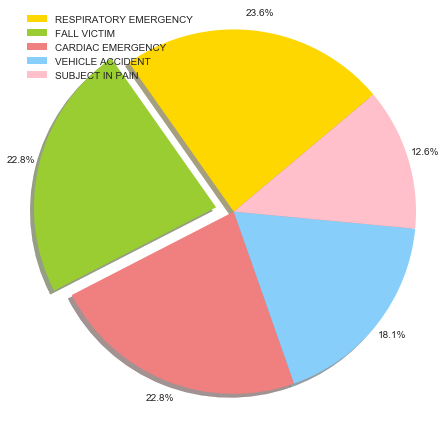

In [16]:
## Plotting top 5 EMS Accidents

labels = raw_data[raw_data["gen_title"]== "EMS"]["sub_title"].value_counts(sort = True).head(5).keys().tolist()
sizes = raw_data[raw_data["gen_title"]== "EMS"]["sub_title"].value_counts(sort = True).head(5).values.tolist()

colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue','pink']


explode = (0, 0.1, 0, 0, 0) #taking out the 2nd bite
plt.figure(figsize=(6,6))


#Pie chart
plt.pie(sizes, explode=explode, autopct='%1.1f%%', colors= colors,
        shadow=True, startangle=40, pctdistance=1.1)

plt.legend(labels, loc = 2)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.tight_layout()
plt.show()

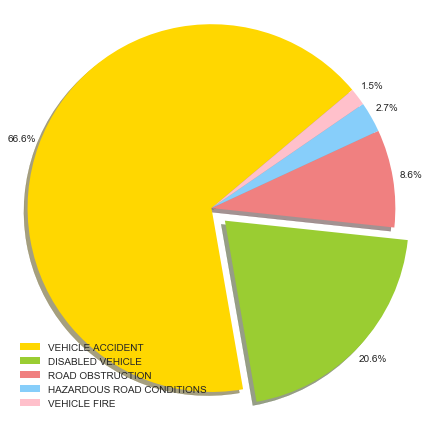

In [17]:
## Plotting top 5 Traffic Accidents

labels = raw_data[raw_data["gen_title"]== "Traffic"]["sub_title"].value_counts(sort = True).head(5).keys().tolist()
sizes = raw_data[raw_data["gen_title"]== "Traffic"]["sub_title"].value_counts(sort = True).head(5).values.tolist()

colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue','pink']


explode = (0, 0.1, 0, 0, 0) #taking out the 2nd bite
plt.figure(figsize=(6,6))


#Pie chart
plt.pie(sizes, explode=explode, autopct='%1.1f%%', colors= colors,
        shadow=True, startangle=40, pctdistance=1.1)

plt.legend(labels, loc = 3)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.tight_layout()
plt.show()

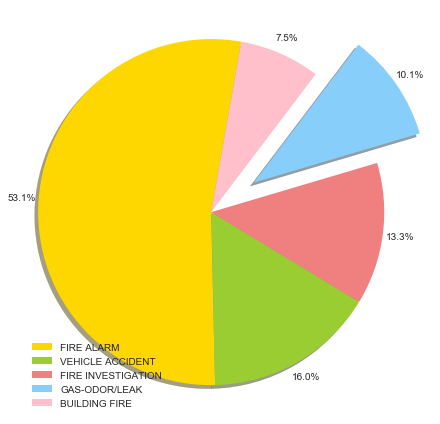

In [18]:
## Plotting top 5 Fire Accidents

labels = raw_data[raw_data["gen_title"]== "Fire"]["sub_title"].value_counts(sort = True).head().keys().tolist()
sizes = raw_data[raw_data["gen_title"]== "Fire"]["sub_title"].value_counts(sort = True).head().values.tolist()

colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue','pink']


explode = (0, 0, 0, 0.3, 0) #taking out the 2nd bite
plt.figure(figsize=(6,6))


#Pie chart
plt.pie(sizes, explode=explode, autopct='%1.1f%%', colors= colors,
        shadow=True, startangle=80, pctdistance=1.1)

plt.legend(labels, loc = 3)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.tight_layout()
plt.show()

In [19]:
#Lets look at traffic accidents
ta = raw_data[raw_data["gen_title"] =="Traffic"]
tap = pd.pivot_table(ta, values= "e", columns= "sub_title", index= "timeStamp", aggfunc= np.sum)

# I almost forgot to convert Timestamp column into real Datetime object
tap.index = tap.index.to_datetime()

#Resampling based on timestamp under variable tar
tar=tap.resample('W', how=[np.sum]).reset_index()
tar.fillna(0)
tar.head()

,index,DEBRIS/FLUIDS ON HIGHWAY,DISABLED VEHICLE,HAZARDOUS ROAD CONDITIONS,ROAD OBSTRUCTION,VEHICLE ACCIDENT,VEHICLE FIRE,VEHICLE LEAKING FUEL
,,sum,sum,sum,sum,sum,sum,sum
0,2015-12-13,1.0,85.0,4.0,18.0,281.0,8.0,1.0
1,2015-12-20,1.0,143.0,16.0,76.0,740.0,11.0,1.0
2,2015-12-27,NaN,174.0,14.0,65.0,770.0,12.0,4.0
3,2016-01-03,2.0,158.0,8.0,45.0,528.0,11.0,1.0
4,2016-01-10,2.0,200.0,34.0,78.0,599.0,17.0,1.0


In [20]:
#We see there is a sum column. It makes our table look dirty, let's remove it
tar.columns = tar.columns.get_level_values(0)
tar.head()

,index,DEBRIS/FLUIDS ON HIGHWAY,DISABLED VEHICLE,HAZARDOUS ROAD CONDITIONS,ROAD OBSTRUCTION,VEHICLE ACCIDENT,VEHICLE FIRE,VEHICLE LEAKING FUEL
0,2015-12-13,1.0,85.0,4.0,18.0,281.0,8.0,1.0
1,2015-12-20,1.0,143.0,16.0,76.0,740.0,11.0,1.0
2,2015-12-27,NaN,174.0,14.0,65.0,770.0,12.0,4.0
3,2016-01-03,2.0,158.0,8.0,45.0,528.0,11.0,1.0
4,2016-01-10,2.0,200.0,34.0,78.0,599.0,17.0,1.0


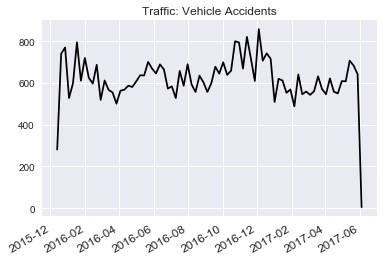

In [21]:
#Plotting Vehicle Accidents

fig, ax = plt.subplots()
ax.get_xaxis().tick_bottom()    
ax.get_yaxis().tick_left() 
plt.xticks(fontsize=12) 



ax.plot_date(tar['index'], tar["VEHICLE ACCIDENT"],fmt ='k')



ax.set_title("Traffic: Vehicle Accidents")
fig.autofmt_xdate()
plt.show()

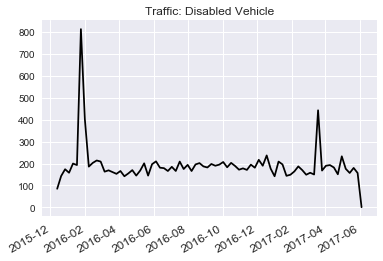

In [22]:
#Plotting Disabled Vehicle reports
fig, ax = plt.subplots()
ax.get_xaxis().tick_bottom()    
ax.get_yaxis().tick_left() 
plt.xticks(fontsize=12) 



ax.plot_date(tar['index'], tar["DISABLED VEHICLE"],fmt ='k')



ax.set_title("Traffic: Disabled Vehicle")
fig.autofmt_xdate()
plt.show()

In [23]:
#Getting all fire accidents
fa = raw_data[raw_data["gen_title"]== "Fire"]
#Getting accidents where victims are burned
burn_victims = fa[fa['sub_title'] == "BURN VICTIM"]

#Creating our initial map
burn_map = folium.Map(location=[40.204339, -75.352524],tiles= "OpenStreetMap", zoom_start= 11)

#Marking mpoints on our map
for each in burn_victims.iterrows():
    folium.Marker(location = [each[1]["lat"],each[1]["lng"]]).add_to(burn_map)

#Saving the map
burn_map.save('burn_map.html')

# #Displaying the map
# burn_map

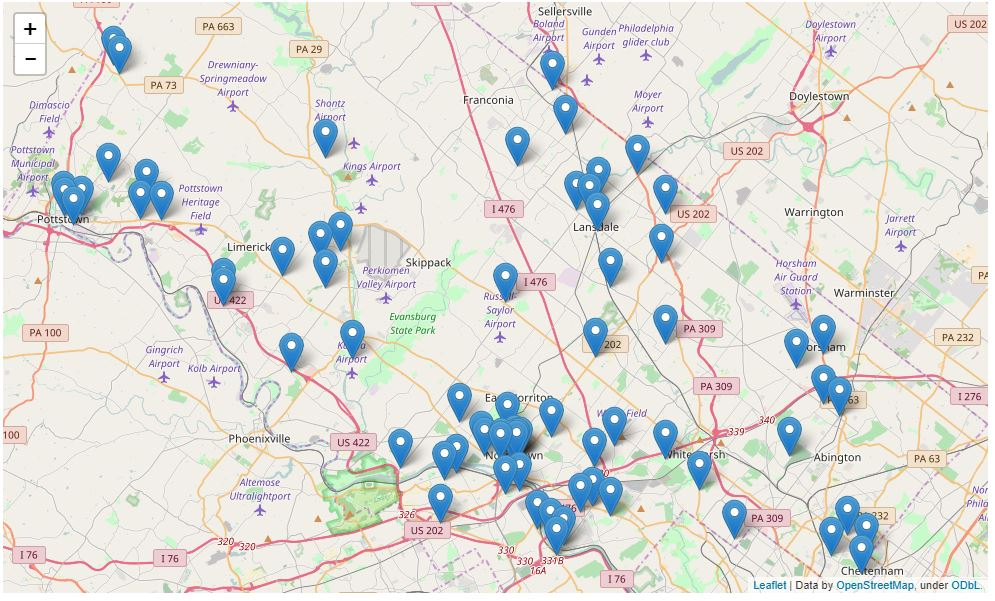

In [24]:
from IPython.display import Image
Image(filename='burn_map.JPG')